In [1]:
import numpy as np
import gym

In [1]:
import gym
environment = gym.make("FrozenLake-v1", is_slippery=False,render_mode="human")

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.        0.59049   0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.091125  0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.6561    0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.3796875 0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.729     0.       ]
 [0.        0.        0.81      0.       ]
 [0.        0.9       0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.        0.       ]]


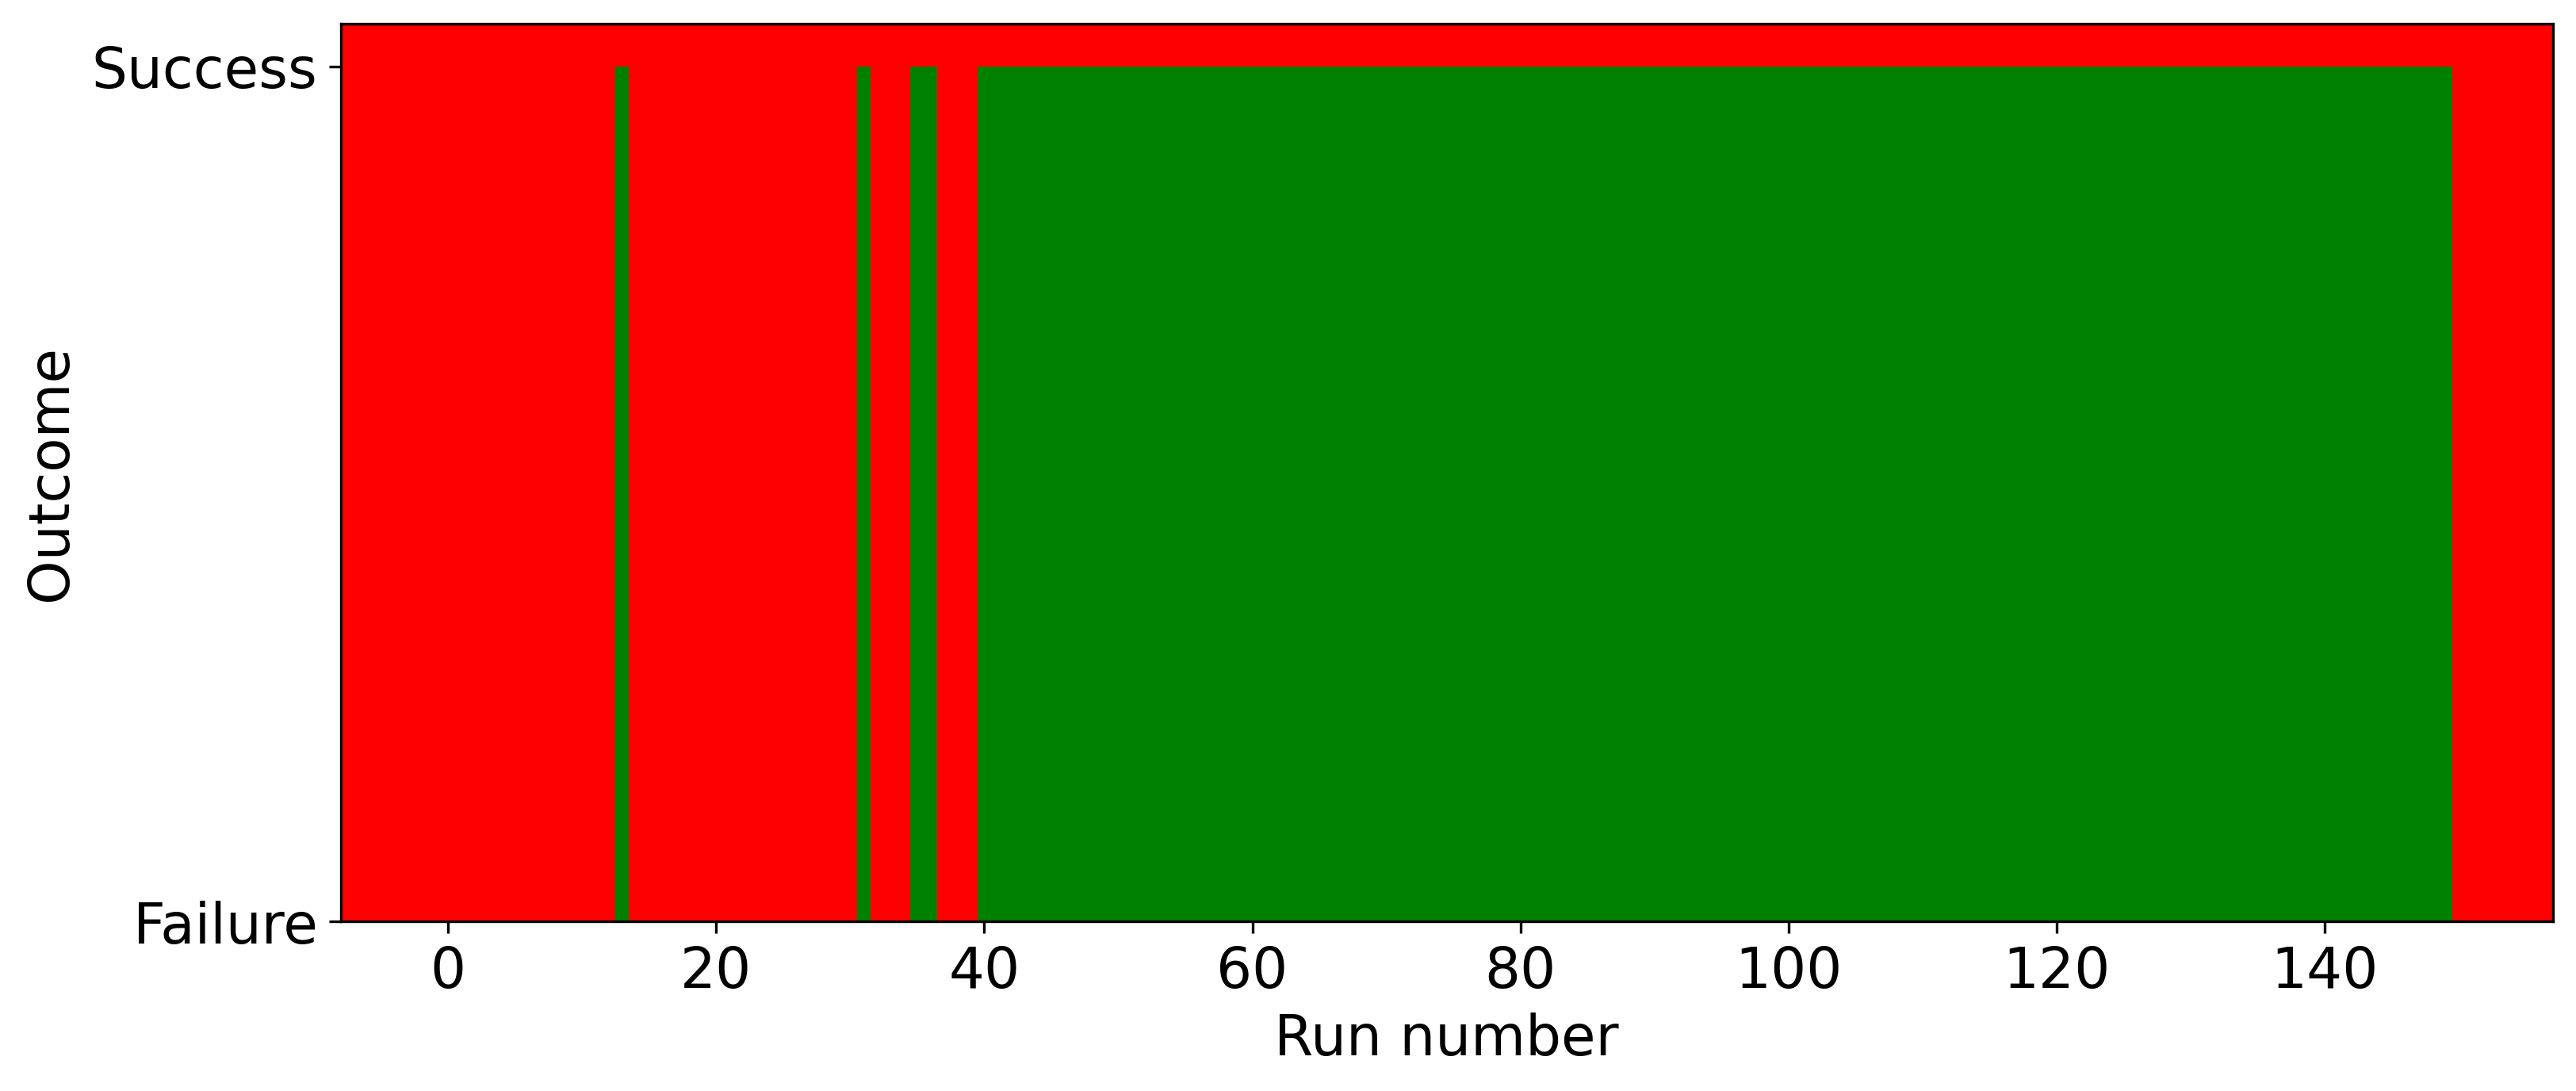

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})


qtable = np.zeros((environment.observation_space.n, environment.action_space.n))


episodes = 150        
alpha = 0.5            
gamma = 0.9            


outcomes = []

print('Q-table before training:')
print(qtable)


for _ in range(episodes):
    state = environment.reset()[0]
    done = False    
    outcomes.append("Failure")    
    while not done:        
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])        
        else:
          	action = environment.action_space.sample()             
        
        new_state, reward, done, info,x = environment.step(action)        
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])       
        
        state = new_state        
        if reward:
          	outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('red')
plt.bar(range(len(outcomes)), outcomes, color="green", width=1.0)
plt.show()

In [2]:
policy=[1,1,2,2,1,2]

In [3]:
import time
#environment.reset()
for i in range(50):
    environment.reset()
    for i in policy:
        
        obs,reward,done,info,x=environment.step(i)
    #environment.reset()
        environment.render()
        time.sleep(0.5)
        if(done):
            environment.reset()
            break